<a href="https://colab.research.google.com/github/MauriceLaf/CAP4630/blob/master/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem 1
##Implement the function get_random_data(w, b, mu, sigma, m) that generates random data for logisitic regression with two features features x_1 and x_2. This function should return the array data of shape (m, 2) and the array labels of shape (m, 1).

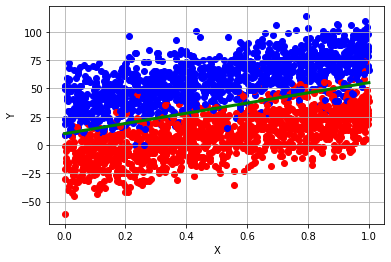

In [279]:
import random
import numpy as np
import matplotlib.pyplot as plt
from random import *
import matplotlib.patches as mpatches

def get_random_data(w, b, mu, sigma, m):

  data_hold = []
  labels_hold = []
  i = 0

  # Do m cycles to have m arrays
  while (i < m):
    ran_c = random()
    # Generate c randomly
    if (ran_c > 0.5):
      c = 1
    else:
      c = 0

    # Get a uniform x and a normal n
    x_1 = np.random.uniform(low=0.0, high=1.0)
    n = np.random.normal(mu, sigma, 1)

    # Calcualte y
    x_2 = w * x_1 + b + (np.power(-1, c)) * n
    # Append to lists to sort later
    data_hold.append([x_1, x_2[0]])
    labels_hold.append([c])
    i += 1

  # Convert lists into np arrays
  data = np.array(data_hold, ndmin=2)
  labels = np.array(labels_hold, ndmin=1)
  training_ind = int(m * 0.8)
  test_ind = m - (m - training_ind) + 1
  return(data, labels)

def display_random_data(data, labels, w, b):

  # Get the x and y points
  points = np.column_stack(data)
  x_s = points[0]
  y_s = points[1]

  plt.xlabel('X', color='black')
  plt.ylabel('Y', color='black')
  plt.grid()

  # Combine together x, y, and c to accuratley plot them
  for point_and_label in zip(x_s, y_s, labels):
    if (point_and_label[2] == 0):
      plt.scatter(point_and_label[0], point_and_label[1], color='blue')
    else:
      plt.scatter(point_and_label[0], point_and_label[1], color='red')

  # Plots the line
  x = np.linspace(0, 1)
  y = w * x + b

  plt.plot(x, y, color='green', linewidth = 3)

data, labels = get_random_data(45, 10, 25, 15, 2500)

display_random_data(data, labels, 45, 10)

#Problem 2
##Create a Keras to implement logistic regression with two features and train it with the data generated in Problem 1. The loss should be the binary cross entropy loss.

####Build the Model


SOURCE: https://www.machinecurve.com/index.php/2019/10/11/how-to-visualize-the-decision-boundary-for-your-keras-model/

In [0]:
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential

#build the model
def build():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

  # compile model
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])
  
  return model

model = build()


###Divide the Data and Train The Model

In [290]:
#divide training and testing data
train_data = data[0:2000]
train_labels = labels[0:2000]

partial_train_data = train_data[0:1000]
partial_train_labels = train_labels[0:1000]

x_val = train_data[1000:2000]
y_val = train_labels[1000:2000]

test_data = data[2000:2500]
test_labels = labels[2000:2500]

#train model
history = model.fit(x=partial_train_data,
                    y=partial_train_labels,
                    epochs=500,
                    batch_size=128,
                    validation_data=(x_val, y_val)
                    )

Epoch 1/500
8/8 [==============================] - 0s 14ms/step - loss: 8.7106 - accuracy: 0.3710 - val_loss: 8.1427 - val_accuracy: 0.3490
Epoch 2/500
8/8 [==============================] - 0s 7ms/step - loss: 8.3553 - accuracy: 0.3710 - val_loss: 7.8628 - val_accuracy: 0.3490
Epoch 3/500
8/8 [==============================] - 0s 7ms/step - loss: 8.0552 - accuracy: 0.3710 - val_loss: 7.6094 - val_accuracy: 0.3490
Epoch 4/500
8/8 [==============================] - 0s 7ms/step - loss: 7.8004 - accuracy: 0.3710 - val_loss: 7.3643 - val_accuracy: 0.3500
Epoch 5/500
8/8 [==============================] - 0s 7ms/step - loss: 7.5433 - accuracy: 0.3710 - val_loss: 7.1229 - val_accuracy: 0.3500
Epoch 6/500
8/8 [==============================] - 0s 9ms/step - loss: 7.2874 - accuracy: 0.3710 - val_loss: 6.8826 - val_accuracy: 0.3500
Epoch 7/500
8/8 [==============================] - 0s 6ms/step - loss: 7.0577 - accuracy: 0.3710 - val_loss: 6.6432 - val_accuracy: 0.3500
Epoch 8/500
8/8 [=========

###Test Model

In [298]:
results = model.evaluate(test_data, test_labels)
preds = (model.predict(test_data) > 0.5).astype("int32")

def compare_labels(test, labels):
  i=0
  matches = 0
  mismatches = 0
  for label in labels:
    if test[i] == labels[i]:
      key = "MATCH"
      matches += 1
    else:
      key = "MISMATCH"
      mismatches +=1
    print(i, ": Label Prediction is:", test[i], "| Actual Label is:", labels[i], key, "| Current Accuracy:", matches / (matches+mismatches))
    i += 1
  return matches / (matches + mismatches)
accuracy = compare_labels(preds, test_labels)
print("Actual Accuracy:", accuracy)

16/16 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9400
[0.1566673070192337, 0.9399999976158142]
0 : Label Prediction is: [1] | Actual Label is: [1] MATCH | Current Accuracy: 1.0
1 : Label Prediction is: [0] | Actual Label is: [0] MATCH | Current Accuracy: 1.0
2 : Label Prediction is: [0] | Actual Label is: [0] MATCH | Current Accuracy: 1.0
3 : Label Prediction is: [0] | Actual Label is: [0] MATCH | Current Accuracy: 1.0
4 : Label Prediction is: [1] | Actual Label is: [1] MATCH | Current Accuracy: 1.0
5 : Label Prediction is: [1] | Actual Label is: [1] MATCH | Current Accuracy: 1.0
6 : Label Prediction is: [0] | Actual Label is: [0] MATCH | Current Accuracy: 1.0
7 : Label Prediction is: [0] | Actual Label is: [0] MATCH | Current Accuracy: 1.0
8 : Label Prediction is: [0] | Actual Label is: [0] MATCH | Current Accuracy: 1.0
9 : Label Prediction is: [0] | Actual Label is: [0] MATCH | Current Accuracy: 1.0
10 : Label Prediction is: [0] | Actual Label is: [0]

###Draw Calculated Line from Model with Actual Line


SOURCE: https://stackoverflow.com/questions/28256058/plotting-decision-boundary-of-logistic-regression
LEGEND SOURCE: https://matplotlib.org/3.2.1/tutorials/intermediate/legend_guide.html 
USING WEIGHTS: https://stackoverflow.com/questions/46817085/keras-interpreting-the-output-of-get-weights 


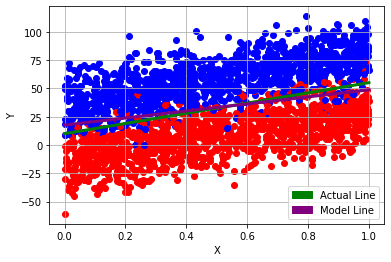

In [318]:
weights = model.layers[0].get_weights()[0]
w1 = weights[0]
w2 = weights[1]
bias = model.layers[0].get_weights()[1]

display_random_data(data, labels, 45, 10)
x = np.linspace(0, 1)
## Calculate Line (y=m*x + b)
y = (-(bias / w2) / (bias / w1)) * x + (-bias / w2)
plt.plot(x, y, color='purple', linewidth = 3)

p1 = mpatches.Patch(color='green', label='Actual Line')
p2 = mpatches.Patch(color='purple', label='Model Line')

plt.legend(handles=[p1,p2])

###Heatmap For Keras

SOURCE: https://medium.com/@michaelscheinfeild/deep-learning-with-keras-d219ce43d5cb
Function plot_decision_boundary used directly from Michael Scheinfeild and slightly changed


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

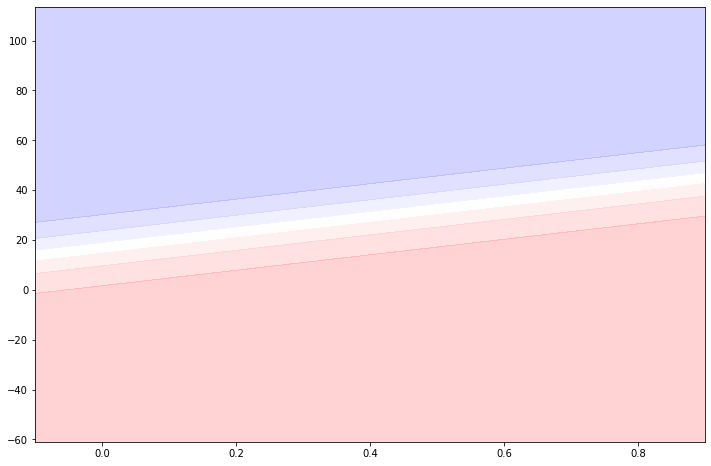

In [349]:
def plot_decision_boundary(model,X,y):

    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) - 0.1
    hticks = np.linspace(amin,amax,101)
    vticks = np.linspace(bmin, bmax, 101)

    aa, bb = np.meshgrid(hticks, vticks)
    ab= np.c_[aa.ravel(), bb.ravel()]#flatten

    #make prediction
    c=model.predict(ab)
    Z=c.reshape(aa.shape)

    plt.figure(figsize=(12,8))
    # plot contour
    plt.contourf(aa,bb,Z, cmap='bwr', alpha =0.2 )
    return plt
plot_decision_boundary(model, data, labels)

#Problem 3
###Use numpy to implement a logistic regression model from scratch and train it with the data generated as in Problem 1.

Hints: Look at the notes on logistic regression to figure out what the gradient is of the binary cross entropy loss with respect to w and b. Note that you only have to implement stochastic gradient, that is, you do not have to write vectorized code for mini-batch gradient descent.

Create a plot showing the random data, the true line used to generate the data, and the separating line of the trained model.

Use a heatmap to visualize the function defined by your trained model.

You also have to compute the binary cross entropy loss and accuracy on the test set.

###Define Functions and Train Model
This also outputs loss

SOURCE: https://kraj3.com.np/blog/2019/08/logistic-regression-algorithm-from-scratch-in-pythonusing-numpy-only/

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


Loss Is: 0.2110065133352241


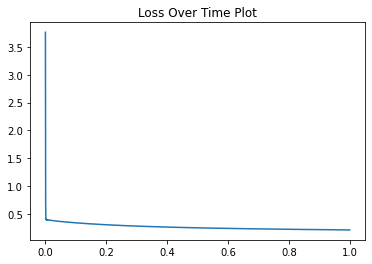

In [284]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def loss_cross_entropy(y_predicted, t):
    return -np.mean(t*np.log(y_predicted)+(1-t)*np.log(1-y_predicted))

def predict(X):
    preds = []
    for i in sigmoid(np.dot(X, W) + b):
        if i>0.5:
            preds.append(1)
        else:
            preds.append(0)
    return preds

np.random.seed(0)
W = np.random.uniform(0,1,size=(train_data.shape[1],1))
b=0.5

train_data = data[0:2000]
train_labels = labels[0:2000]

partial_train_data = train_data[0:1000]
partial_train_labels = train_labels[0:1000]

x_val = train_data[1000:2000]
y_val = train_labels[1000:2000]

test_data = data[2000:2500]
test_labels = labels[2000:2500]

loss_history = []

for i in range(2500):
    Z = np.dot(train_data, W) + b
    Y_output = sigmoid(Z)
    curr_loss = loss_cross_entropy(Y_output,train_labels)
    loss_history.append(curr_loss)
    #print("Current Loss ->",curr_loss)
    grad= Y_output - train_labels
    grad_weight= np.dot(train_data.T,grad)/train_data.shape[0]
    grad_bias = np.average(grad)
    W=W-.01*grad_weight
    b=b-.01*grad_bias


###Show Loss And Plot Loss Over Time


Loss Is: 0.2110065133352241


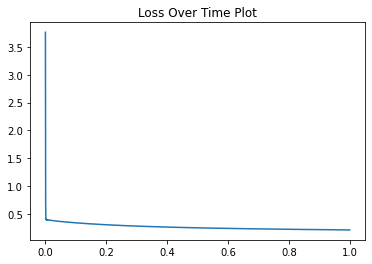

In [287]:

xAx = np.linspace(0,1, num = 2500)
plt.plot(xAx, loss_history)
plt.title("Loss Over Time Plot")
plt.show

print("Loss Is:", curr_loss)

###Make Predictions, output accuracy.


In [285]:
predictions = predict(test_data)
accuracy = compare_labels(predictions, test_labels)
print("Actual Accuracy:", accuracy)

0 : Label Prediction is: 1 | Actual Label is: [1] MATCH | Current Accuracy: 1.0
1 : Label Prediction is: 0 | Actual Label is: [0] MATCH | Current Accuracy: 1.0
2 : Label Prediction is: 0 | Actual Label is: [0] MATCH | Current Accuracy: 1.0
3 : Label Prediction is: 0 | Actual Label is: [0] MATCH | Current Accuracy: 1.0
4 : Label Prediction is: 1 | Actual Label is: [1] MATCH | Current Accuracy: 1.0
5 : Label Prediction is: 1 | Actual Label is: [1] MATCH | Current Accuracy: 1.0
6 : Label Prediction is: 0 | Actual Label is: [0] MATCH | Current Accuracy: 1.0
7 : Label Prediction is: 0 | Actual Label is: [0] MATCH | Current Accuracy: 1.0
8 : Label Prediction is: 0 | Actual Label is: [0] MATCH | Current Accuracy: 1.0
9 : Label Prediction is: 0 | Actual Label is: [0] MATCH | Current Accuracy: 1.0
10 : Label Prediction is: 0 | Actual Label is: [0] MATCH | Current Accuracy: 1.0
11 : Label Prediction is: 0 | Actual Label is: [0] MATCH | Current Accuracy: 1.0
12 : Label Prediction is: 1 | Actual L

###Plot Decision Line and Actual Line

https://medium.com/@thomascountz/calculate-the-decision-boundary-of-a-single-perceptron-visualizing-linear-separability-c4d77099ef38 


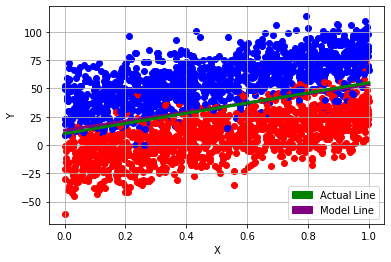

In [286]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(train_data, np.ravel(train_labels))
#b
intercept = model.intercept_
#w1 & w2
x = np.linspace(0, 1)
b1 = model.coef_
w1 = b1[0][0]
w2 = b1[0][1]
b = intercept
m = -(b / w2) / (b / w1)
y_intercept = -b / w2

y = m*x + y_intercept
plt.plot(x, y, 'purple', linewidth = 3)

p1 = mpatches.Patch(color='green', label='Actual Line')
p2 = mpatches.Patch(color='purple', label='Model Line')
plt.legend(handles=[p1,p2])

display_random_data(data, labels, 45, 10)

###Heatmap for Numpy Model
SOURCE: https://medium.com/@michaelscheinfeild/deep-learning-with-keras-d219ce43d5cb Function plot_decision_boundary used directly from Michael Scheinfeild and slightly changed 

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

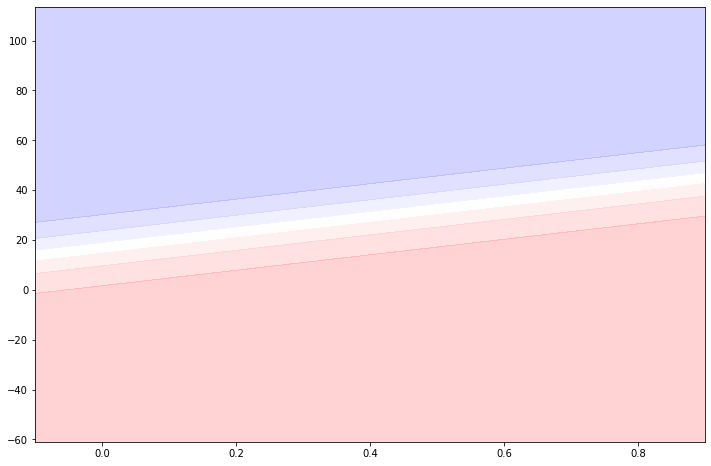

In [350]:
plot_decision_boundary(model, data, labels)